<a href="https://colab.research.google.com/github/florinaptl/FP_test_VR/blob/main/20240204_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [263]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import os


# Raw dataset

In [264]:
path="/content/drive/MyDrive/Data collected with participant's info"
extension='.csv'
files = [file for file in os.listdir(path) if file.endswith(extension)]


In [265]:
for file in files:
    print(file);

OutputOf_Viktor_Marton.csv
OutputOf_Lena_Fisker.csv
OutputOf_Oscar_Findal_Andreassen.csv
OutputOf_Qizhi_Yang.csv
OutputOf_Kristina_Hoffmann.csv
OutputOf_Chang_Xiong.csv
OutputOf_Anne_Sorensen.csv
OutputOf_Dagmar.csv
OutputOf_Adrian_Daniel_McCreadie.csv
OutputOf_Andreas_Kaae_Astrup.csv
OutputOf_Ana_Paula_Barcia.csv
OutputOf_Daniel_Rasmussen.csv
OutputOf_Sofie_Sogaard.csv
OutputOf_Anna_Kristoffersen.csv
OutputOf_Frederik_Callesen.csv
OutputOf_Alexandru_Cioanca.csv
OutputOf_Nathan_Dupas.csv
OutputOf_Thorvald_Lund.csv
OutputOf_Florina_Pantilimonescu.csv
OutputOf_Jialiang_Wang.csv
OutputOf_Xiao_Xia_Hao.csv
OutputOf_Hannah_Jerg.csv
OutputOf_David_Stamenov.csv
OutputOf_ValentinaBeatini_test.csv
OutputOf_Xinyu_Shi.csv
OutputOf_Yasmin_Taghizadeh.csv
OutputOf_Lasse_Weyergang_Rahbek.csv


In [266]:
raw_dfs = []
for file in files:
    myPath="".join((path, '/', file))
    df = pd.read_csv(myPath, encoding='unicode_escape')
    raw_dfs.append(df)
raw_df = pd.concat(raw_dfs, ignore_index=True)

raw_df.head()


,pleasure,arousal,dominance,speed,nrCircles,noOfSpots,spotsPosition,spotRadius,nrOfCurrentSequence,nameOfCurrentSequence,myTime,myFrameNumber,actualTime,actualFrameNumber,Name,Age group,Nationality,Gender,allocatedTimeForRating
0,3,1,2,0.010000,1,1,0,0.60,0,initial mood,14.24,712,179.24,8962,Viktor Márton,1,hungarian,2,179.24
1,3,3,3,0.883787,3,10,0,0.40,2,random 2,38.06,1903,307.34,15367,Viktor Márton,1,hungarian,2,128.10
2,3,3,3,5.000000,3,8,0,0.60,3,high speed few spots,58.74,2937,411.12,20556,Viktor Márton,1,hungarian,2,103.78
3,4,2,4,0.200000,3,50,0,0.60,4,medium speed high nr of spots,66.48,3324,447.64,22382,Viktor Márton,1,hungarian,2,36.52
4,2,4,2,0.200000,3,5,0,1.15,5,explosion with big radius,82.62,4131,455.30,22765,Viktor Márton,1,hungarian,2,7.66


# Participant's statistics

In [267]:
participants_df=raw_df[["Name", "Age group","Nationality", "Gender"]]
participants_df=participants_df.drop_duplicates()

participants_df.head()

,Name,Age group,Nationality,Gender
0,Viktor Márton,1,hungarian,2
17,Lena Fisker,0,danish,1
33,Oscar Findal Andreassen,0,danish,2
50,Qizhi Yang,1,chinese,2
67,Kristina Hoffmann,1,danish,1


## Describe nationality, age group and gender

Text(0.5, 1.0, 'Participants by nationality')

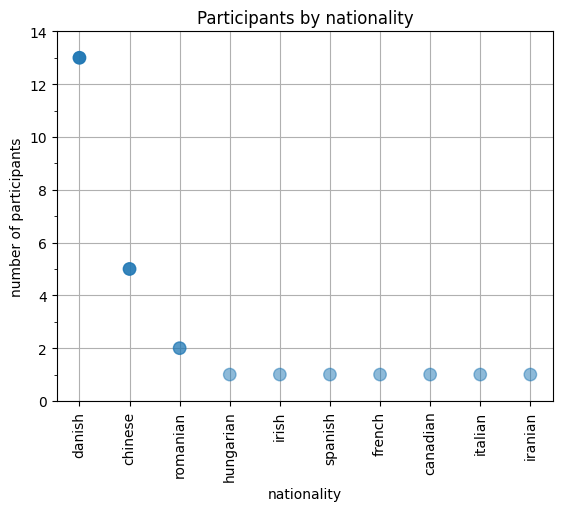

In [268]:
fig, ax=plt.subplots()
nationality_counts=participants_df['Nationality'].value_counts()
ax.scatter(nationality_counts.index, nationality_counts.values, s=80, alpha=1-1/nationality_counts.values/2)

ax.set_yticks(np.arange(0,15,1), minor=True)
plt.setp(ax.get_xticklabels(), rotation=90)
ax.grid(True)
ax.set_axisbelow(True)

ax.set_xlabel("nationality")
ax.set_ylabel("number of participants")
ax.set_title("Participants by nationality")

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

Text(0.5, 1.0, 'Participants by age group')

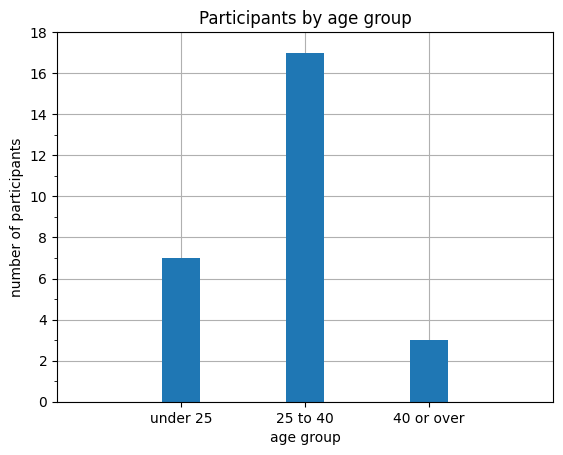

In [269]:
fig, ax=plt.subplots()
age_counts=participants_df['Age group'].value_counts()
ax.bar(age_counts.index, age_counts.values, width=0.3)

ax.set_yticks(np.arange(0,15,1), minor=True)
ax.grid(True)
ax.set_axisbelow(True)

ax.set(xlim=(-1,3),
       ylim=(0,18))
ax.set_xticks([0,1,2], labels=['under 25', '25 to 40', '40 or over'])
ax.set_xlabel("age group")
ax.set_ylabel("number of participants")
ax.set_title("Participants by age group")

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

## Describe rating

Text(0.5, 1.0, 'Participants by pleasure and time')

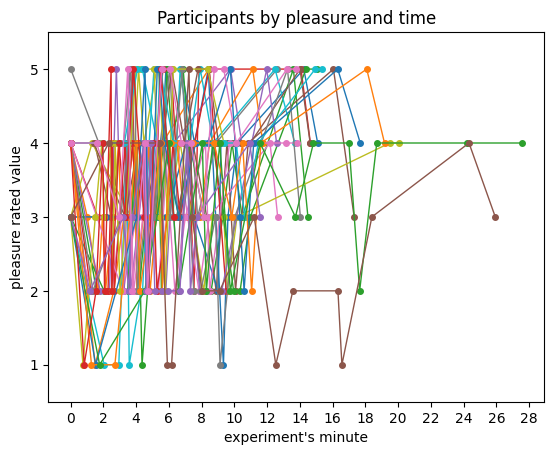

In [270]:
fig, ax=plt.subplots()


for i in range(participants_df.shape[0]):
  myParticipant_df=raw_df[raw_df['Name']==participants_df['Name'].iloc[i]]
  ax.plot((myParticipant_df['actualTime'].iloc[:myParticipant_df.shape[0] if myParticipant_df.shape[0]<=17 else 17]-myParticipant_df['actualTime'].iloc[0])/60, myParticipant_df['pleasure'].iloc[:myParticipant_df.shape[0] if myParticipant_df.shape[0]<=17 else 17], 'o', ls='-', ms=4, lw=1)
  #print(participants_df['Name'].iloc[i])
  #print(myParticipant_df['actualTime']-myParticipant_df['actualTime'].iloc[0])

ax.set(ylim=(0.5,5.5))
ax.set_xticks(np.arange(0,30,2))
ax.set_yticks(np.arange(1,6,1))
ax.set_xlabel("experiment's minute")
ax.set_ylabel("pleasure rated value")
ax.set_title("Participants by pleasure and time")

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')


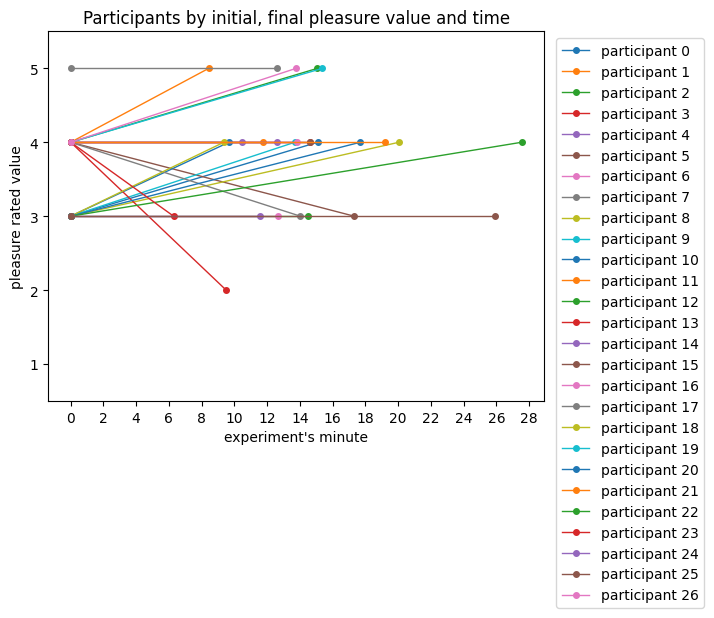

In [271]:
fig, ax=plt.subplots()


for i in range(participants_df.shape[0]):
  myParticipant_df=raw_df[raw_df['Name']==participants_df['Name'].iloc[i]]
  ax.plot((myParticipant_df['actualTime'].iloc[[0,myParticipant_df.shape[0]-1] if myParticipant_df.shape[0]<=17 else [0,16]]-myParticipant_df['actualTime'].iloc[0])/60, myParticipant_df['pleasure'].iloc[[0,myParticipant_df.shape[0]-1] if myParticipant_df.shape[0]<=17 else [0,16]],
          'o', ls='-', ms=4, lw=1, label="participant "+str(i))
  #print(participants_df['Name'].iloc[i])
  #print(myParticipant_df['actualTime']-myParticipant_df['actualTime'].iloc[0])

ax.set(ylim=(0.5,5.5))
ax.set_xticks(np.arange(0,30,2))
ax.set_yticks(np.arange(1,6,1))
ax.set_xlabel("experiment's minute")
ax.set_ylabel("pleasure rated value")
ax.set_title("Participants by initial, final pleasure value and time")
plt.legend(bbox_to_anchor=(1.01, 1))

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

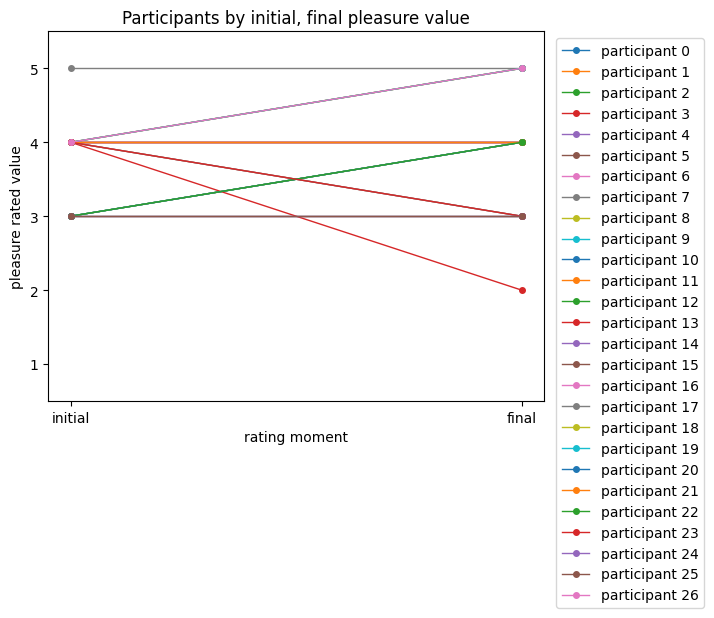

In [272]:
fig, ax=plt.subplots()


for i in range(participants_df.shape[0]):
  myParticipant_df=raw_df[raw_df['Name']==participants_df['Name'].iloc[i]]
  ax.plot([0,1], myParticipant_df['pleasure'].iloc[[0,myParticipant_df.shape[0]-1] if myParticipant_df.shape[0]<=17 else [0,16]],
          'o', ls='-', ms=4, lw=1, label="participant "+str(i))
  #print(participants_df['Name'].iloc[i])
  #print(myParticipant_df['actualTime']-myParticipant_df['actualTime'].iloc[0])

ax.set(ylim=(0.5,5.5))
ax.set_xticks([0,1], labels=['initial', 'final'])
ax.set_yticks(np.arange(1,6,1))
ax.set_xlabel("rating moment")
ax.set_ylabel("pleasure rated value")
ax.set_title("Participants by initial, final pleasure value")
plt.legend(bbox_to_anchor=(1.01, 1))

### Describe rating for initial and final mood

In [273]:
initialFinal_data=raw_df[raw_df['nameOfCurrentSequence'].isin(['initial mood', 'final mood'])]
initialFinal_data.head()


,pleasure,arousal,dominance,speed,nrCircles,noOfSpots,spotsPosition,spotRadius,nrOfCurrentSequence,nameOfCurrentSequence,myTime,myFrameNumber,actualTime,actualFrameNumber,Name,Age group,Nationality,Gender,allocatedTimeForRating
0,3,1,2,0.01,1,1,0,0.6,0,initial mood,14.24,712,179.24,8962,Viktor Márton,1,hungarian,2,179.24
16,4,2,4,0.01,1,1,0,0.6,17,final mood,260.66,13033,1084.36,54218,Viktor Márton,1,hungarian,2,50.70
17,4,1,3,0.01,1,1,0,0.6,0,initial mood,7.70,385,157.70,7885,Lena Fisker,0,danish,1,157.70
33,3,3,3,0.01,1,1,0,0.6,0,initial mood,11.82,591,521.82,26091,Oscar Findal Andreassen,0,danish,2,521.82
49,3,3,1,0.20,2,1,0,0.6,17,final mood,263.26,13163,1391.34,69567,Oscar Findal Andreassen,0,danish,2,53.30


In [274]:
initialFinalRating_df=pd.DataFrame({'pleasureInitial':[], 'pleasureFinal':[], 'arousalInitial':[], 'arousalFinal':[], 'dominanceInitial':[], 'dominanceFinal':[], 'Name':[]})

for i in range(participants_df.shape[0]):
  myParticipant_df=initialFinal_data[initialFinal_data['Name']==participants_df['Name'].iloc[i]]
  if myParticipant_df.shape[0] in [2,3]:
      row=pd.DataFrame({
          'pleasureInitial':  [myParticipant_df[myParticipant_df['nameOfCurrentSequence']=='initial mood'].iloc[0].at['pleasure']],
          'pleasureFinal':    [myParticipant_df[myParticipant_df['nameOfCurrentSequence']=='final mood'].iloc[0].at['pleasure']],
          'arousalInitial':   [myParticipant_df[myParticipant_df['nameOfCurrentSequence']=='initial mood'].iloc[0].at['arousal']],
          'arousalFinal':     [myParticipant_df[myParticipant_df['nameOfCurrentSequence']=='final mood'].iloc[0].at['arousal']],
          'dominanceInitial': [myParticipant_df[myParticipant_df['nameOfCurrentSequence']=='initial mood'].iloc[0].at['dominance']],
          'dominanceFinal':   [myParticipant_df[myParticipant_df['nameOfCurrentSequence']=='final mood'].iloc[0].at['dominance']],
          'Name': [myParticipant_df['Name'].iloc[0]]})
      initialFinalRating_df=pd.concat([initialFinalRating_df,row], ignore_index = True)
initialFinalRating_df


,pleasureInitial,pleasureFinal,arousalInitial,arousalFinal,dominanceInitial,dominanceFinal,Name
0,3.0,4.0,1.0,2.0,2.0,4.0,Viktor Márton
1,3.0,3.0,3.0,3.0,3.0,1.0,Oscar Findal Andreassen
2,4.0,4.0,3.0,1.0,4.0,5.0,Qizhi Yang
3,4.0,4.0,4.0,3.0,3.0,3.0,Kristina Hoffmann
4,4.0,3.0,2.0,2.0,3.0,2.0,Chang Xiong
5,3.0,3.0,3.0,3.0,3.0,3.0,Anne Sørensen
6,3.0,4.0,1.0,1.0,4.0,5.0,Adrian Daniel McCreadie
7,3.0,4.0,3.0,3.0,3.0,5.0,Andreas Kaae Astrup
8,4.0,4.0,3.0,1.0,3.0,5.0,Daniel Rasmussen
9,4.0,5.0,2.0,2.0,3.0,4.0,Sofie Søgaard


<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Participants by initial and final pleasure value')

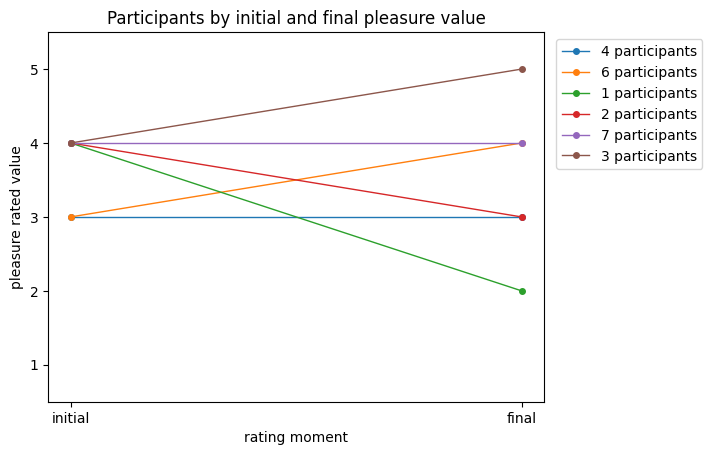

In [275]:
pleasureGrouped_df=initialFinalRating_df[['pleasureInitial', 'pleasureFinal', 'Name']]
pleasureGrouped_df=pleasureGrouped_df.groupby(['pleasureInitial', 'pleasureFinal']).describe().reset_index()
print(type(pleasureGrouped_df))
fig, ax=plt.subplots()
for i in range(pleasureGrouped_df.shape[0]):
    ax.plot([0,1], [pleasureGrouped_df.iloc[i].at['pleasureInitial'], pleasureGrouped_df.iloc[i].at['pleasureFinal']],
            'o', ls='-', ms=4, lw=1, label=str(pleasureGrouped_df.iloc[i].to_frame().loc['Name'].loc['count'].iloc[0])+" participants")
plt.legend(bbox_to_anchor=(1.01, 1))

ax.set(ylim=(0.5,5.5))
ax.set_xticks([0,1], labels=['initial', 'final'])
ax.set_yticks(np.arange(1,6,1))
ax.set_xlabel("rating moment")
ax.set_ylabel("pleasure rated value")
ax.set_title("Participants by initial and final pleasure value")

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Participants by initial and final arousal value')

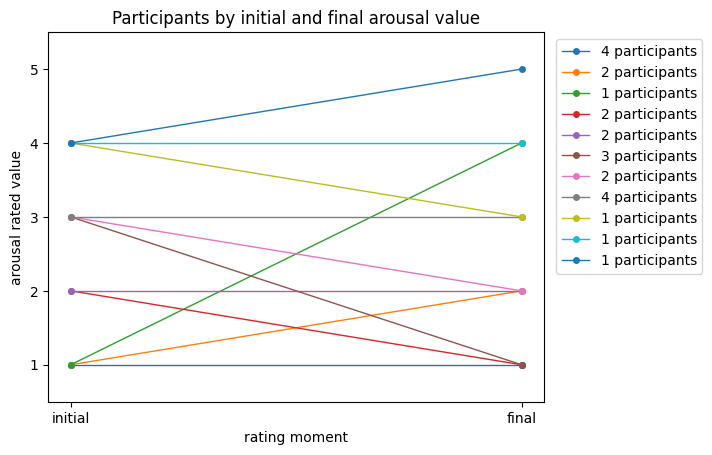

In [276]:
pleasureGrouped_df=initialFinalRating_df[['arousalInitial', 'arousalFinal', 'Name']]
pleasureGrouped_df=pleasureGrouped_df.groupby(['arousalInitial', 'arousalFinal']).describe().reset_index()
print(type(pleasureGrouped_df))
fig, ax=plt.subplots()
for i in range(pleasureGrouped_df.shape[0]):
    ax.plot([0,1], [pleasureGrouped_df.iloc[i].at['arousalInitial'], pleasureGrouped_df.iloc[i].at['arousalFinal']],
            'o', ls='-', ms=4, lw=1, label=str(pleasureGrouped_df.iloc[i].to_frame().loc['Name'].loc['count'].iloc[0])+" participants")
plt.legend(bbox_to_anchor=(1.01, 1))

ax.set(ylim=(0.5,5.5))
ax.set_xticks([0,1], labels=['initial', 'final'])
ax.set_yticks(np.arange(1,6,1))
ax.set_xlabel("rating moment")
ax.set_ylabel("arousal rated value")
ax.set_title("Participants by initial and final arousal value")

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Participants by initial and final dominance value')

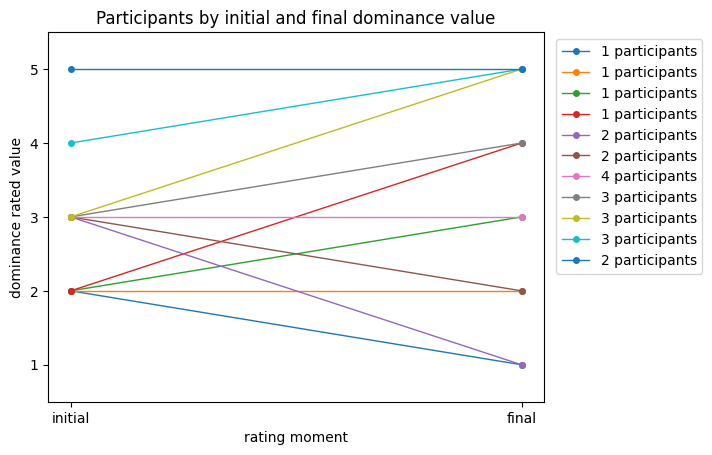

In [277]:
pleasureGrouped_df=initialFinalRating_df[['dominanceInitial', 'dominanceFinal', 'Name']]
pleasureGrouped_df=pleasureGrouped_df.groupby(['dominanceInitial', 'dominanceFinal']).describe().reset_index()
print(type(pleasureGrouped_df))
fig, ax=plt.subplots()
for i in range(pleasureGrouped_df.shape[0]):
    ax.plot([0,1], [pleasureGrouped_df.iloc[i].at['dominanceInitial'], pleasureGrouped_df.iloc[i].at['dominanceFinal']],
            'o', ls='-', ms=4, lw=1, label=str(pleasureGrouped_df.iloc[i].to_frame().loc['Name'].loc['count'].iloc[0])+" participants")
plt.legend(bbox_to_anchor=(1.01, 1))

ax.set(ylim=(0.5,5.5))
ax.set_xticks([0,1], labels=['initial', 'final'])
ax.set_yticks(np.arange(1,6,1))
ax.set_xlabel("rating moment")
ax.set_ylabel("dominance rated value")
ax.set_title("Participants by initial and final dominance value")

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

### Describe rating numbers and time

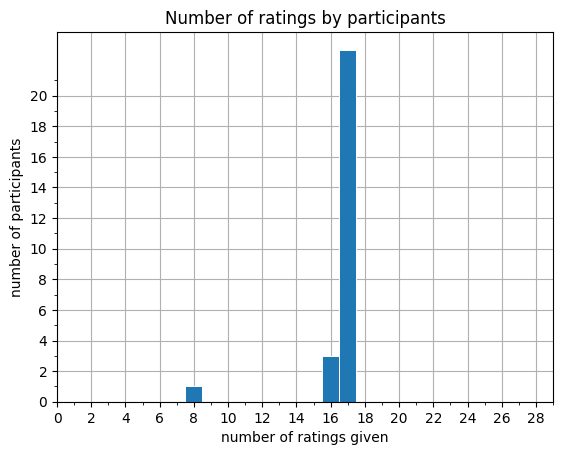

In [278]:
#count the number of numbers given
participant_counts=raw_df["Name"].value_counts()
type(participant_counts.to_frame())
participant_counts=participant_counts.reset_index()
participant_counts=participant_counts['count'].value_counts()
participant_counts

fig, ax = plt.subplots()
ax.bar(participant_counts.index, participant_counts.values, width=1, edgecolor="white", linewidth=0.7)

ax.set_xticks(np.arange(0,30,2), minor=False)
ax.set_xticks(np.arange(0,30,1), minor=True)
ax.set(ylabel="number of participants", xlabel="number of ratings given")
ax.set_yticks(np.arange(0,22,2), minor=False)
ax.set_yticks(np.arange(0,22,1), minor=True)
ax.set_title("Number of ratings by participants")

ax.grid(True)
ax.set_axisbelow(True)

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

[Text(0.5, 0, "experiment's seconds"),
 Text(0, 0.5, 'frequency'),
 Text(0.5, 1.0, 'Frequency of time allocated per rating')]

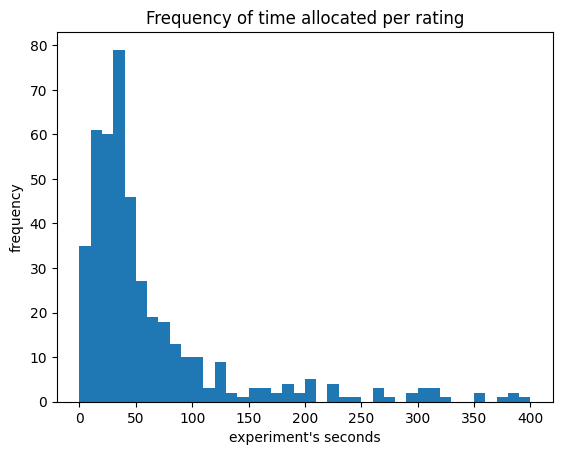

In [279]:
#time of response
fig, ax=plt.subplots()

ax.hist(raw_df['allocatedTimeForRating'], bins=40, density=False, range=(0,400))
#ax.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())
ax.set(xlabel="experiment's seconds", ylabel="frequency", title="Frequency of time allocated per rating")

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

Text(0.5, 1, 'Time allocated per rating')

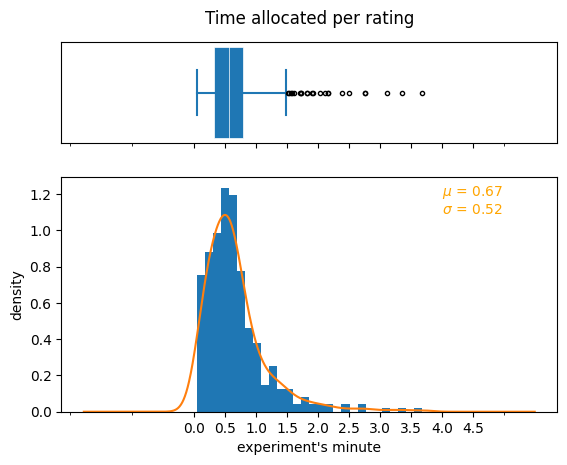

In [280]:
filteredData=raw_df[~raw_df['nameOfCurrentSequence'].isin(['initial mood', 'custom', 'random 2'])]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})

#box plot - the outliers are
VP = ax_box.boxplot(filteredData['allocatedTimeForRating']/60, positions=[2], widths=1.5, patch_artist=True, vert=False,
                showmeans=False, showfliers=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5},
                flierprops={"markersize":3} )

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(0,5,0.5))

#histogram plot
n, bins, patches=ax_hist.hist(filteredData['allocatedTimeForRating']/60, bins='auto', density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

myKde=(filteredData['allocatedTimeForRating']/60).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(filteredData['allocatedTimeForRating']/60).mean().round(2)}\n"
         f"$\\sigma$ = {(filteredData['allocatedTimeForRating']/60).std().round(2)}\n"
         )
ax_hist.text(4,1,stats, color='orange')

ax_hist.set(xlabel="experiment's minute", ylabel="density")
ax_hist.set_title("Time allocated per rating", y=1, pad=110)

#fig.savefig(ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

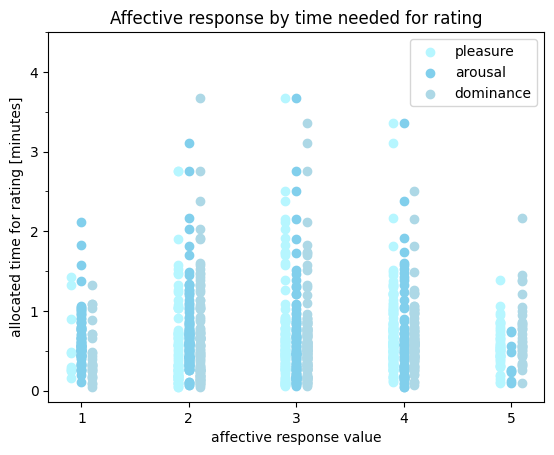

In [281]:
fig, ax=plt.subplots()

ax.scatter(filteredData['pleasure']-0.1, filteredData['allocatedTimeForRating']/60, label="pleasure", color="#B6F6FF")
ax.scatter(filteredData['arousal'], filteredData['allocatedTimeForRating']/60, label="arousal", color="#81CFEC" )
ax.scatter(filteredData['dominance']+0.1, filteredData['allocatedTimeForRating']/60, label="dominance", color="lightblue" )

ax.set_xticks(np.arange(1,6,1), minor=False)
ax.set(ylabel="allocated time for rating [minutes]", xlabel="affective response value")
ax.set_yticks(np.arange(0,5,1), minor=False)
ax.set_yticks(np.arange(0,5,0.5), minor=True)
ax.set_title("Affective response by time needed for rating")
ax.legend()

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

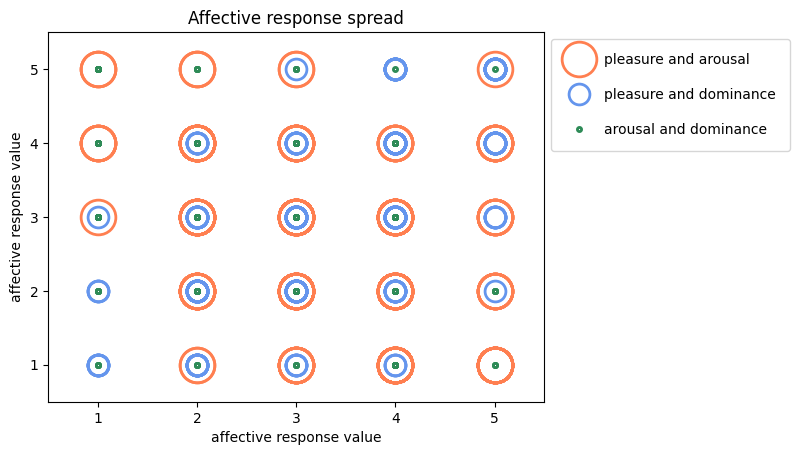

In [282]:
fig, ax=plt.subplots()

ax.plot((filteredData.sort_values(by=['pleasure']))['pleasure'], (filteredData.sort_values(by=['pleasure']))['arousal'],'o', fillstyle='none', markeredgecolor="coral", markersize=25, markeredgewidth=2, label="pleasure and arousal")
ax.plot((filteredData.sort_values(by=['pleasure']))['pleasure'], (filteredData.sort_values(by=['pleasure']))['dominance'], 'o', fillstyle='none', markeredgecolor="cornflowerblue", markersize=15, markeredgewidth=2, label='pleasure and dominance')
ax.plot((filteredData.sort_values(by=['arousal']))['arousal'], (filteredData.sort_values(by=['arousal']))['dominance'], 'o', fillstyle='none', markeredgecolor="seagreen", markersize=3, markeredgewidth=2, label='arousal and dominance')

ax.set_xticks(np.arange(1,6,1), minor=False)
ax.set(xlabel="affective response value", ylabel="affective response value")
ax.set_yticks(np.arange(1,6,1), minor=False)
ax.set_title("Affective response spread")
ax.set_xlim(0.5,5.5)
ax.set_ylim(0.5,5.5)

ax.legend(bbox_to_anchor=(1,1), borderpad=1, labelspacing=1.5)

(0.5, 5.5)

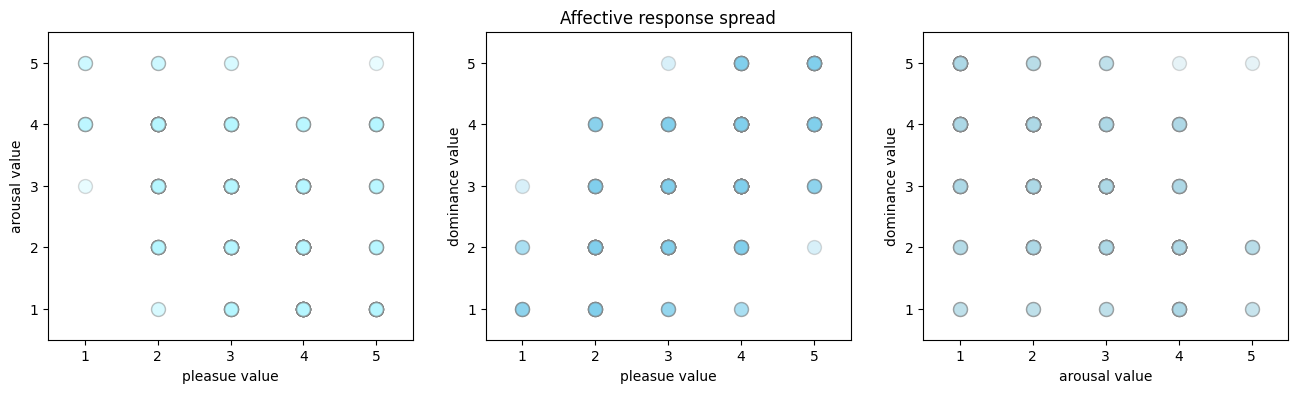

In [363]:
fig, ax=plt.subplots(1,3, figsize=(16,4))

ax[0].plot((filteredData.sort_values(by=['pleasure']))['pleasure'], (filteredData.sort_values(by=['pleasure']))['arousal'],'o', color='#B6F6FF', markersize=10, label="pleasure and arousal", alpha=0.3, markeredgecolor='grey')
ax[1].plot((filteredData.sort_values(by=['pleasure']))['pleasure'], (filteredData.sort_values(by=['pleasure']))['dominance'], 'o', color="#81CFEC", markersize=10, label='pleasure and dominance', alpha=0.3, markeredgecolor='grey')
ax[2].plot((filteredData.sort_values(by=['arousal']))['arousal'], (filteredData.sort_values(by=['arousal']))['dominance'], 'o', color="lightblue", markersize=10, label='arousal and dominance', alpha=0.3, markeredgecolor='grey')


ax[0].set_xticks(np.arange(1,6,1), minor=False)
ax[0].set(xlabel="pleasue value", ylabel="arousal value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
#ax[0].set_title("Affective response spread")
ax[0].set_xlim(0.5,5.5)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks(np.arange(1,6,1), minor=False)
ax[1].set(xlabel="pleasue value", ylabel="dominance value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response spread")
ax[1].set_xlim(0.5,5.5)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks(np.arange(1,6,1), minor=False)
ax[2].set(xlabel="arousal value", ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
#ax[2].set_title("Affective response spread")
ax[2].set_xlim(0.5,5.5)
ax[2].set_ylim(0.5,5.5)

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

## Describe affective response during experiment

In the data for describing the affective response (pleasure, arousal, dominance), the following sequences are removed: initial mood, final mood.

In [284]:
afectiveResponse_df=raw_df[~raw_df['nameOfCurrentSequence'].isin(['initial mood', 'final mood'])]
print(afectiveResponse_df.shape)

(397, 19)


[136  97  83  64  17]   [4 3 2 5 1]
[117 102  84  82  12]   [2 3 1 4 5]
[131 101  98  41  26]   [3 2 4 5 1]
Pleasure, arousal and dominance values' frequencies


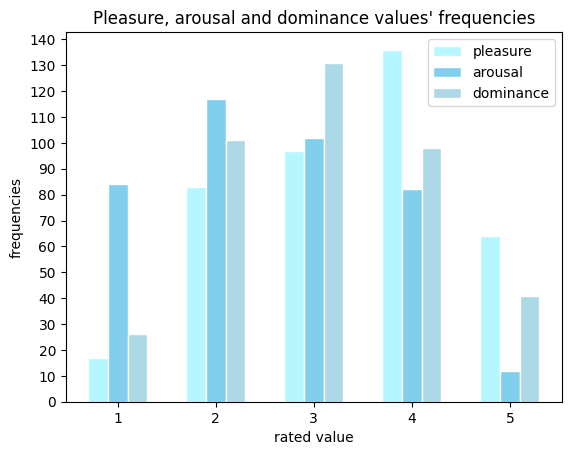

In [285]:
fig, ax=plt.subplots()
#values, bins, patches=ax.hist(afectiveResponse_df['pleasure'], bins=5)

counts=afectiveResponse_df['pleasure'].value_counts().values
values=afectiveResponse_df['pleasure'].value_counts().index.values
print(counts, " ", values)
rects=ax.bar(values-0.2, counts, width=0.2, color='#B6F6FF', label='pleasure', edgecolor='w')
#ax.bar_label(rects, padding=3)

counts=afectiveResponse_df['arousal'].value_counts().values
values=afectiveResponse_df['arousal'].value_counts().index.values
print(counts, " ", values)
ax.bar(values, counts, width=0.2, color='#81CFEC', label='arousal', edgecolor='w')

counts=afectiveResponse_df['dominance'].value_counts().values
values=afectiveResponse_df['dominance'].value_counts().index.values
print(counts, " ", values)
ax.bar(values+0.2, counts, width=0.2, color='lightblue', label='dominance', edgecolor='w')

ax.set(xlabel="rated value", ylabel="frequencies", title="Pleasure, arousal and dominance values' frequencies")
ax.set_yticks(np.arange(0,150,10))
ax.legend()

#fig.savefig(ax.get_title()+'.png', dpi=600)

# Dataset - new features

In [376]:
my_df=raw_df
#my_df["procentageOpaqueOfFacade"]
my_df["nrOfMinimalUnitsPerSpot"]=my_df.apply(lambda x:
                                            int(sum((math.sqrt(k*100*(x.spotRadius*k/x.nrCircles if (k==0 or k==x.nrCircles) else x.spotRadius*k/x.nrCircles*(1-0.4*k/(1+0.4*k))))+2)
                                            if k==x.nrCircles else (1 if k==0 else (math.sqrt(k*100*(x.spotRadius*k/x.nrCircles if (k==0 or k==x.nrCircles) else x.spotRadius*k/x.nrCircles*(1-0.4*k/(1+0.4*k))))+2+k))
                                                for k in range(0,x.nrCircles+1) ) ), axis=1)
my_df["opaqueAresOfSpot"]=my_df.apply(lambda x: x.nrOfMinimalUnitsPerSpot*3.14*0.026**2, axis=1)
my_df["areaOpaque"]=my_df.apply(lambda x: x.noOfSpots*x.opaqueAresOfSpot, axis=1)
my_df["covarageAreaOfSpot"]=my_df.apply(lambda x: 3.14*x.spotRadius**2, axis=1)
my_df["areaFacadeTotal"]=3.5*6
my_df["procentageOpaqueOfFacade"]=my_df.apply(lambda x: round(x.areaOpaque/x.areaFacadeTotal,4), axis=1)
my_df["compactnessOfElement"]=my_df.apply(lambda x: round(x.opaqueAresOfSpot/x.covarageAreaOfSpot,4), axis=1)
my_df["boundingRadiusOfElement"]=my_df.apply(lambda x: round(x.spotRadius,2), axis=1)
my_df["realSpeed"]=my_df.apply(lambda x: round(x.speed*34.67,2), axis=1)
my_df["maxNrOfElements"]=my_df.apply(lambda x: int(x.areaFacadeTotal/x.covarageAreaOfSpot if x.spotsPosition==0 else x.areaFacadeTotal/x.covarageAreaOfSpot/3), axis=1)
my_df["emptyNumberOfElements"]=my_df.apply(lambda x: x.maxNrOfElements-x.noOfSpots, axis=1)
my_df["filledProportionOnFacade"]=my_df.apply(lambda x: round(x.emptyNumberOfElements/x.noOfSpots,2), axis=1)
my_df["maxiumDistanceBetweenElements"]=my_df.apply(lambda x: (0 if x.emptyNumberOfElements<=2 else x.filledProportionOnFacade*2*x.spotRadius) if x.emptyNumberOfElements<x.maxNrOfElements*0.75 else 3, axis=1)
my_df["compactnessOfFacade"]=my_df.apply(lambda x: round(x.maxiumDistanceBetweenElements/math.sqrt(3.5**2+6**2),4), axis=1)
my_df["accelerationOfChangingElementSize"]=my_df.apply(lambda x: 2*3.14*0.05**2 if ("explosion" in x.nameOfCurrentSequence and "big" in x.nameOfCurrentSequence) else (2*3.14*0.005**2 if ("explosion" in x.nameOfCurrentSequence and "small" in x.nameOfCurrentSequence) else 0), axis=1)

pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
my_df.head(50)


,pleasure,arousal,dominance,speed,nrCircles,noOfSpots,spotsPosition,spotRadius,nrOfCurrentSequence,nameOfCurrentSequence,myTime,myFrameNumber,actualTime,actualFrameNumber,Name,Age group,Nationality,Gender,allocatedTimeForRating,nrOfMinimalUnitsPerSpot,opaqueAresOfSpot,areaOpaque,covarageAreaOfSpot,areaFacadeTotal,procentageOpaqueOfFacade,compactnessOfElement,boundingRadiusOfElement,realSpeed,maxNrOfElements,emptyNumberOfElements,filledProportionOnFacade,maxiumDistanceBetweenElements,compactnessOfFacade,accelerationOfChangingElementSize
0,3,1,2,0.010000,1,1,0,0.600000,0,initial mood,14.24,712,179.24,8962,Viktor Márton,1,hungarian,2,179.24,10,0.021226,0.021226,1.130400,21.0,0.0010,0.0188,0.60,0.35,18,17,17.00,3.000000,0.4319,0.000000
1,3,3,3,0.883787,3,10,0,0.400000,2,random 2,38.06,1903,307.34,15367,Viktor Márton,1,hungarian,2,128.10,29,0.061557,0.615566,0.502400,21.0,0.0293,0.1225,0.40,30.64,41,31,3.10,3.000000,0.4319,0.000000
2,3,3,3,5.000000,3,8,0,0.600000,3,high speed few spots,58.74,2937,411.12,20556,Viktor Márton,1,hungarian,2,103.78,33,0.070047,0.560377,1.130400,21.0,0.0267,0.0620,0.60,173.35,18,10,1.25,1.500000,0.2159,0.000000
3,4,2,4,0.200000,3,50,0,0.600000,4,medium speed high nr of spots,66.48,3324,447.64,22382,Viktor Márton,1,hungarian,2,36.52,33,0.070047,3.502356,1.130400,21.0,0.1668,0.0620,0.60,6.93,18,-32,-0.64,0.000000,0.0000,0.000000
4,2,4,2,0.200000,3,5,0,1.150000,5,explosion with big radius,82.62,4131,455.30,22765,Viktor Márton,1,hungarian,2,7.66,43,0.091274,0.456368,4.152650,21.0,0.0217,0.0220,1.15,6.93,5,0,0.00,0.000000,0.0000,0.015700
5,4,2,4,0.500000,3,15,0,0.600000,6,medium speed medium number of spots,98.66,4933,494.00,24700,Viktor Márton,1,hungarian,2,38.70,33,0.070047,1.050707,1.130400,21.0,0.0500,0.0620,0.60,17.34,18,3,0.20,0.240000,0.0346,0.000000
6,3,3,3,0.500000,5,10,0,0.450000,7,explosion with small radius,109.44,5472,498.48,24924,Viktor Márton,1,hungarian,2,4.48,56,0.118868,1.188678,0.635851,21.0,0.0566,0.1869,0.45,17.34,33,23,2.30,2.070001,0.2980,0.000157
7,5,1,5,0.100000,3,50,0,0.600000,8,low speed high number of spots,134.80,6740,528.32,26416,Viktor Márton,1,hungarian,2,29.84,33,0.070047,3.502356,1.130400,21.0,0.1668,0.0620,0.60,3.47,18,-32,-0.64,0.000000,0.0000,0.000000
8,5,1,5,0.200000,7,30,0,0.300000,9,density of many compact spots,146.94,7347,585.30,29265,Viktor Márton,1,hungarian,2,56.98,77,0.163443,4.903298,0.282600,21.0,0.2335,0.5784,0.30,6.93,74,44,1.47,0.882000,0.1270,0.000000
9,4,2,4,0.200000,3,30,1,0.600000,10,lower area position,152.60,7630,632.94,31647,Viktor Márton,1,hungarian,2,47.64,33,0.070047,2.101414,1.130400,21.0,0.1001,0.0620,0.60,6.93,6,-24,-0.80,0.000000,0.0000,0.000000


# Selected dataset

In [298]:
mySelected_secquences=my_df[~my_df['nameOfCurrentSequence'].isin(['initial mood', 'final mood', 'random 2', 'high speed few spots'])]
mySelected_df=mySelected_secquences[["pleasure", "arousal", "dominance", "spotsPosition", "allocatedTimeForRating", "procentageOpaqueOfFacade", "compactnessOfElement", "compactnessOfFacade", "boundingRadiusOfElement", "realSpeed", "accelerationOfChangingElementSize" ]]
mySelected_df.head(mySelected_df.shape[0])
print(my_df.shape)
print(mySelected_secquences.shape)
print(mySelected_df.shape)

(447, 34)
(343, 34)
(343, 11)


In [299]:
corrMatrix=mySelected_df.corr()
corrMatrix

,pleasure,arousal,dominance,spotsPosition,allocatedTimeForRating,procentageOpaqueOfFacade,compactnessOfElement,compactnessOfFacade,boundingRadiusOfElement,realSpeed,accelerationOfChangingElementSize
pleasure,1.000000,-0.452313,0.660115,0.049118,0.308228,0.060447,0.009863,-0.135985,-0.258023,0.007016,-0.282918
arousal,-0.452313,1.000000,-0.449542,0.010883,-0.254072,-0.010900,0.014761,0.076729,0.195680,0.080974,0.309588
dominance,0.660115,-0.449542,1.000000,0.029209,0.340199,-0.051697,0.033333,-0.035329,-0.187143,-0.006765,-0.184937
spotsPosition,0.049118,0.010883,0.029209,1.000000,0.237544,-0.077780,-0.108764,-0.197471,-0.160607,-0.024684,-0.126147
allocatedTimeForRating,0.308228,-0.254072,0.340199,0.237544,1.000000,-0.058692,-0.123859,-0.105908,-0.073464,0.031610,-0.164251
procentageOpaqueOfFacade,0.060447,-0.010900,-0.051697,-0.077780,-0.058692,1.000000,0.094405,-0.285145,-0.111607,-0.288939,-0.283598
compactnessOfElement,0.009863,0.014761,0.033333,-0.108764,-0.123859,0.094405,1.000000,0.411608,-0.292586,0.216819,-0.072330
compactnessOfFacade,-0.135985,0.076729,-0.035329,-0.197471,-0.105908,-0.285145,0.411608,1.000000,-0.379463,0.253924,0.233151
boundingRadiusOfElement,-0.258023,0.195680,-0.187143,-0.160607,-0.073464,-0.111607,-0.292586,-0.379463,1.000000,-0.317059,0.455898
realSpeed,0.007016,0.080974,-0.006765,-0.024684,0.031610,-0.288939,0.216819,0.253924,-0.317059,1.000000,-0.034004


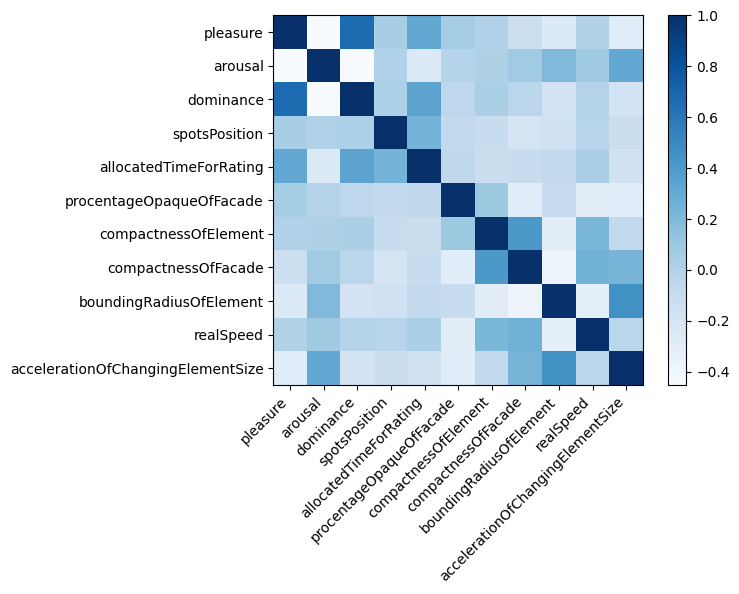

In [361]:
matrix = corrMatrix

#plotting correlation matrix
plt.imshow(matrix, cmap='Blues')

#adding colorbar
plt.colorbar()

#extracting variable names
variables = []
for i in matrix.columns:
  variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()

# Features statistics

## realSpeed

Text(0.5, 1, 'Speed [cm/s]')

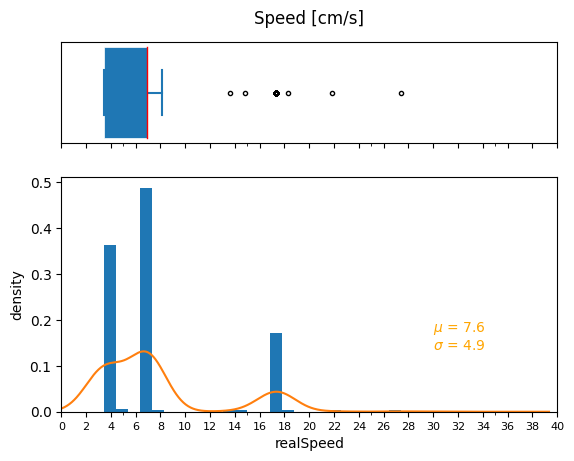

In [374]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
myFeature='realSpeed'

#box plot - the outliers are
VP = ax_box.boxplot(mySelected_df[myFeature], positions=[2], widths=1.5, patch_artist=True, vert=False,
                showmeans=False, showfliers=True,
                medianprops={"color": "red", "linewidth": 1},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5},
                flierprops={"markersize":3} )

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(0,200,2))
ax_box.set_xlim(0,40)

#histogram plot
n, bins, patches=ax_hist.hist(mySelected_df[myFeature], bins='auto', density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

myKde=(mySelected_df[myFeature]).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(mySelected_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(mySelected_df[myFeature]).std().round(2)}\n"
         )
ax_hist.text(30,0.1,stats, color='orange')

ax_hist.set_xlabel(myFeature, fontsize=10)
ax_hist.set_ylabel("density", fontsize=10)
plt.setp(ax_hist.get_xticklabels(), fontsize=8)
ax_hist.set_title("Speed [cm/s]", y=1, pad=110)

#fig.savefig(ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

(0.5, 5.5)

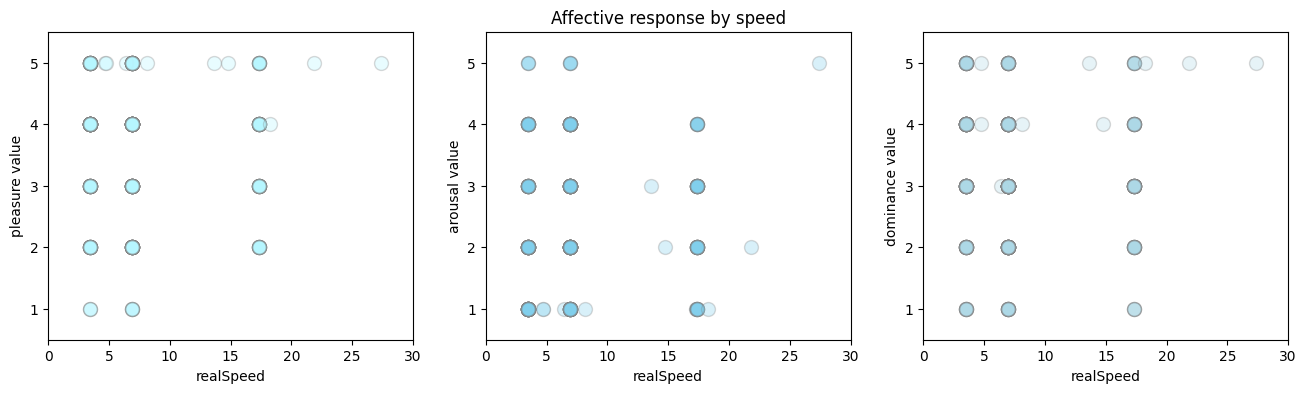

In [357]:
fig, ax=plt.subplots(1,3,figsize=(16,4))
myFeature='realSpeed'

ax[0].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['pleasure'],'o', color='#B6F6FF', markersize=10, label="pleasure", alpha=0.3, markeredgecolor='grey')
ax[1].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['arousal'],'o', color='#81CFEC', markersize=10, label="arousal", alpha=0.3, markeredgecolor='grey')
ax[2].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['dominance'],'o', color='lightblue', markersize=10, label="dominance", alpha=0.3, markeredgecolor='grey')


ax[0].set_xticks(np.arange(0,200,5), minor=False)
ax[0].set(xlabel=myFeature, ylabel="pleasure value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
ax[0].set_xlim(0,30)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks(np.arange(0,200,5), minor=False)
ax[1].set(xlabel=myFeature, ylabel="arousal value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response by speed")
ax[1].set_xlim(0,30)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks(np.arange(0,200,5), minor=False)
ax[2].set(xlabel=myFeature, ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
ax[2].set_xlim(0,30)
ax[2].set_ylim(0.5,5.5)

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

## accelerationOfChangingElementSize

Text(0.5, 1.0, 'Acceleration of changing element size')

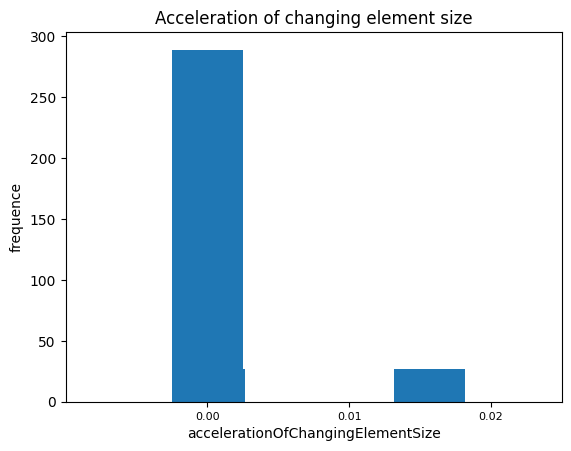

In [395]:
fig, ax_hist = plt.subplots()
myFeature='accelerationOfChangingElementSize'


#ax_hist.set_yticks(np.arange(0,0))
ax_hist.set_xticks(np.arange(0,0.1,0.01))
ax_hist.set_xlim(-0.01,0.025)



ax_hist.bar(mySelected_df[myFeature].value_counts().index, mySelected_df[myFeature].value_counts().values, width=0.005)


ax_hist.set_xlabel(myFeature, fontsize=10)
ax_hist.set_ylabel("frequence", fontsize=10)
plt.setp(ax_hist.get_xticklabels(), fontsize=8)
ax_hist.set_title("Acceleration of changing element size")

#fig.savefig(ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

(0.5, 5.5)

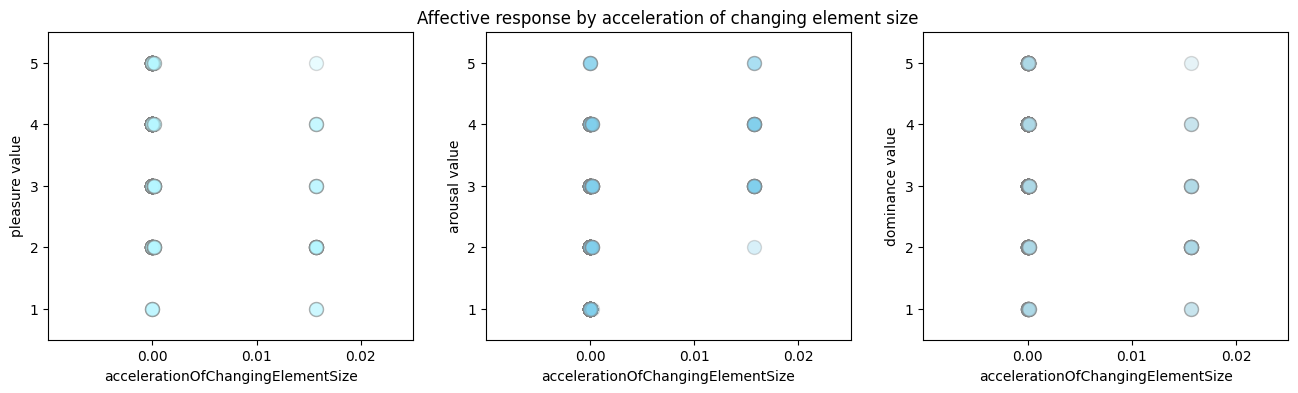

In [396]:
fig, ax=plt.subplots(1,3,figsize=(16,4))
myFeature='accelerationOfChangingElementSize'

ax[0].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['pleasure'],'o', color='#B6F6FF', markersize=10, label="pleasure", alpha=0.3, markeredgecolor='grey')
ax[1].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['arousal'],'o', color='#81CFEC', markersize=10, label="arousal", alpha=0.3, markeredgecolor='grey')
ax[2].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['dominance'],'o', color='lightblue', markersize=10, label="dominance", alpha=0.3, markeredgecolor='grey')


ax[0].set_xticks(np.arange(0,0.1,0.01))
ax[0].set(xlabel=myFeature, ylabel="pleasure value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
ax[0].set_xlim(-0.01,0.025)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks(np.arange(0,0.1,0.01))
ax[1].set(xlabel=myFeature, ylabel="arousal value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response by acceleration of changing element size")
ax[1].set_xlim(-0.01,0.025)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks(np.arange(0,0.1,0.01))
ax[2].set(xlabel=myFeature, ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
ax[2].set_xlim(-0.01,0.025)
ax[2].set_ylim(0.5,5.5)

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

## procentageOpaqueOfFacade

(0.0, 1.2)

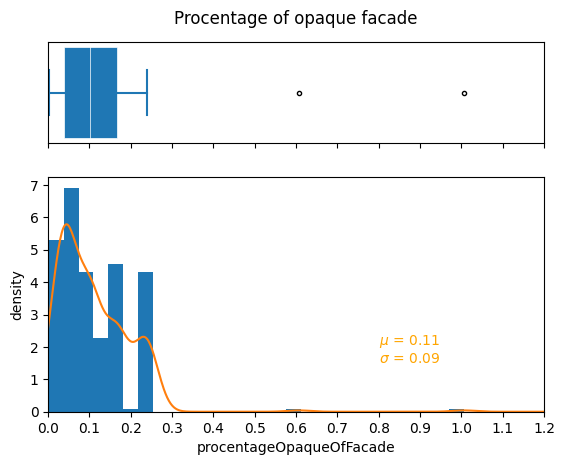

In [301]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
myFeature='procentageOpaqueOfFacade'

#box plot - the outliers are
VP = ax_box.boxplot(mySelected_df[myFeature], positions=[2], widths=1.5, patch_artist=True, vert=False,
                showmeans=False, showfliers=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5},
                flierprops={"markersize":3} )

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(0,2,0.1))
ax_box.set_xlim(-0.2,1)

#histogram plot
n, bins, patches=ax_hist.hist(mySelected_df[myFeature], bins='auto', density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

myKde=(mySelected_df[myFeature]).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(mySelected_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(mySelected_df[myFeature]).std().round(2)}\n"
         )
ax_hist.text(0.8,1,stats, color='orange')

ax_hist.set(xlabel=myFeature, ylabel="density")
ax_hist.set_title("Procentage of opaque facade", y=1, pad=110)
ax_hist.set_xlim(0,1.2)

#fig.savefig(ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

(0.5, 5.5)

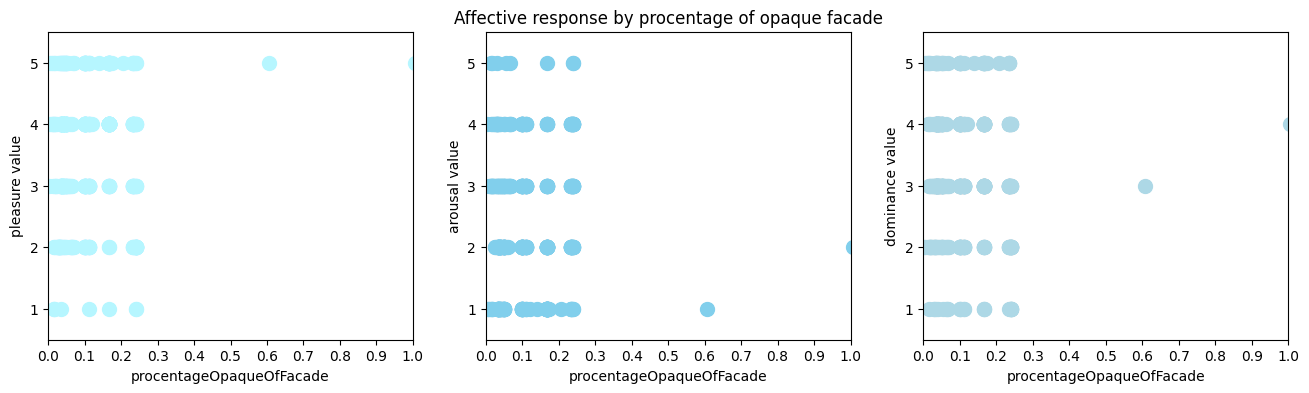

In [302]:
fig, ax=plt.subplots(1,3,figsize=(16,4))
myFeature='procentageOpaqueOfFacade'

ax[0].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['pleasure'],'o', color='#B6F6FF', markersize=10, label="pleasure")
ax[1].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['arousal'],'o', color='#81CFEC', markersize=10, label="arousal")
ax[2].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['dominance'],'o', color='lightblue', markersize=10, label="dominance")


ax[0].set_xticks(np.arange(0,1.1,0.1), minor=False)
ax[0].set(xlabel=myFeature, ylabel="pleasure value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
ax[0].set_xlim(0,1)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks(np.arange(0,1.1,0.1), minor=False)
ax[1].set(xlabel=myFeature, ylabel="arousal value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response by procentage of opaque facade")
ax[1].set_xlim(0,1)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks(np.arange(0,1.1,0.1), minor=False)
ax[2].set(xlabel=myFeature, ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
ax[2].set_xlim(0,1)
ax[2].set_ylim(0.5,5.5)

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

## compactnessOfElement

Text(0.5, 1, 'Compactness of element')

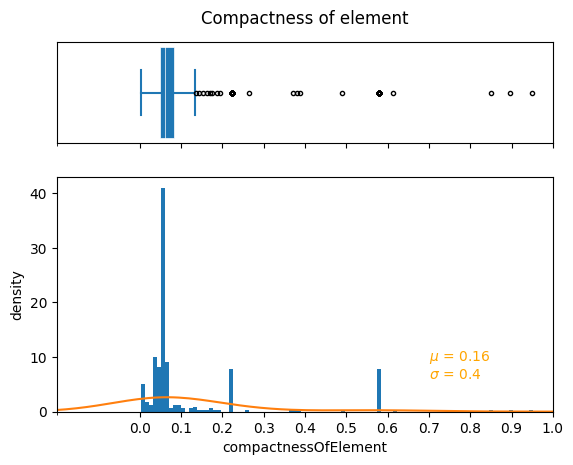

In [303]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
myFeature='compactnessOfElement'

#box plot - the outliers are
VP = ax_box.boxplot(mySelected_df[myFeature], positions=[2], widths=1.5, patch_artist=True, vert=False,
                showmeans=False, showfliers=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5},
                flierprops={"markersize":3} )

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(0,2,0.1))
ax_box.set_xlim(-0.2,1)

#histogram plot
n, bins, patches=ax_hist.hist(mySelected_df[myFeature], bins='auto', density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

myKde=(mySelected_df[myFeature]).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(mySelected_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(mySelected_df[myFeature]).std().round(2)}\n"
         )
ax_hist.text(0.7,3,stats, color='orange')

ax_hist.set(xlabel=myFeature, ylabel="density")
ax_hist.set_title("Compactness of element", y=1, pad=110)

#fig.savefig(ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

(0.5, 5.5)

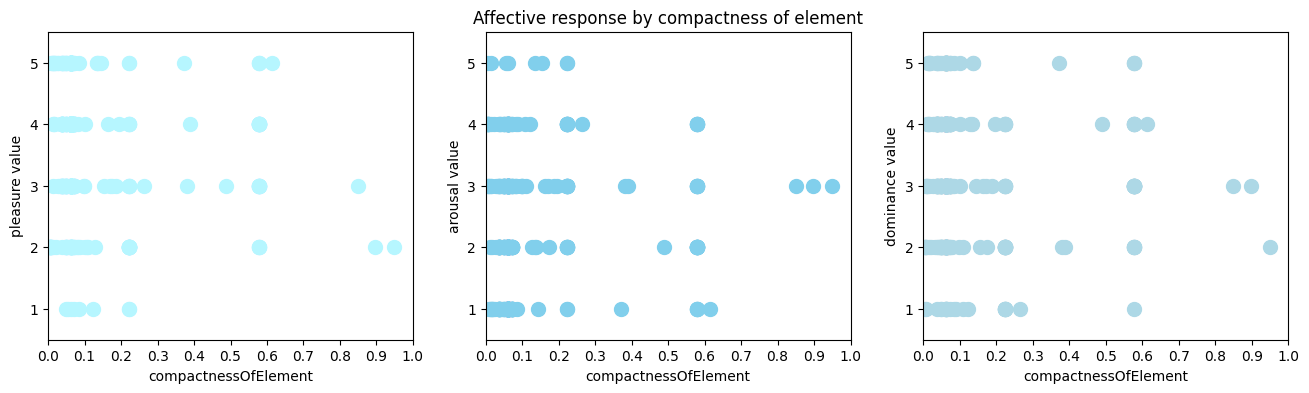

In [304]:
fig, ax=plt.subplots(1,3,figsize=(16,4))
myFeature='compactnessOfElement'

ax[0].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['pleasure'],'o', color='#B6F6FF', markersize=10, label="pleasure")
ax[1].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['arousal'],'o', color='#81CFEC', markersize=10, label="arousal")
ax[2].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['dominance'],'o', color='lightblue', markersize=10, label="dominance")


ax[0].set_xticks(np.arange(0,1.1,0.1), minor=False)
ax[0].set(xlabel=myFeature, ylabel="pleasure value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
ax[0].set_xlim(0,1)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks(np.arange(0,1.1,0.1), minor=False)
ax[1].set(xlabel=myFeature, ylabel="arousal value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response by compactness of element")
ax[1].set_xlim(0,1)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks(np.arange(0,1.1,0.1), minor=False)
ax[2].set(xlabel=myFeature, ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
ax[2].set_xlim(0,1)
ax[2].set_ylim(0.5,5.5)

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

## compactnessOfFacade

Text(0.5, 1, 'Compactness of facade')

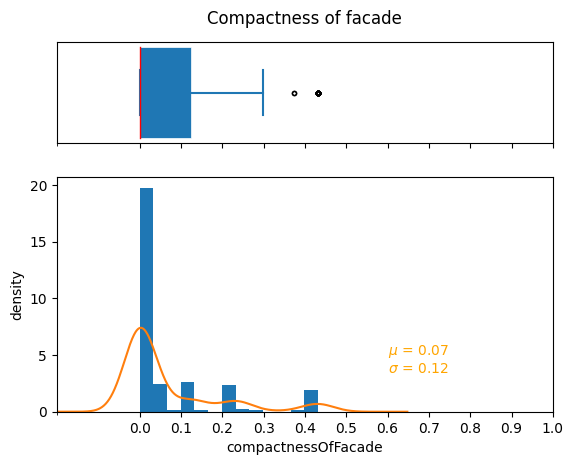

In [373]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
myFeature='compactnessOfFacade'

#box plot - the outliers are
VP = ax_box.boxplot(mySelected_df[myFeature], positions=[2], widths=1.5, patch_artist=True, vert=False,
                showmeans=False, showfliers=True,
                medianprops={"color": "red", "linewidth": 1},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5},
                flierprops={"markersize":3} )

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(0,2,0.1))
ax_box.set_xlim(-0.2,1)

#histogram plot
n, bins, patches=ax_hist.hist(mySelected_df[myFeature], bins='auto', density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

myKde=(mySelected_df[myFeature]).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(mySelected_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(mySelected_df[myFeature]).std().round(2)}\n"
         )
ax_hist.text(0.6,2,stats, color='orange')

ax_hist.set(xlabel=myFeature, ylabel="density")
ax_hist.set_title('Compactness of facade', y=1, pad=110)

#fig.savefig(ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

(0.5, 5.5)

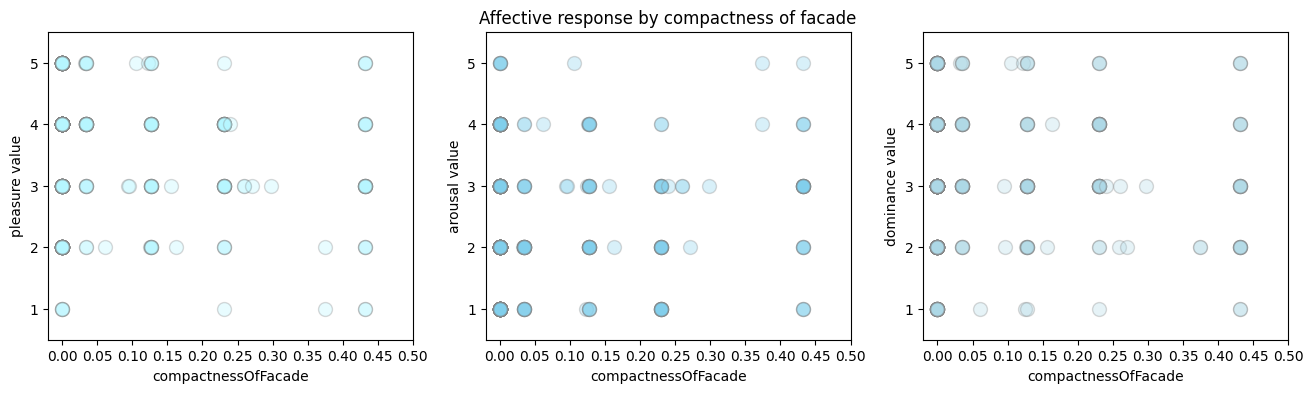

In [394]:
fig, ax=plt.subplots(1,3,figsize=(16,4))
myFeature='compactnessOfFacade'

ax[0].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['pleasure'],'o', color='#B6F6FF', markersize=10, label="pleasure", alpha=0.3, markeredgecolor='grey')
ax[1].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['arousal'],'o', color='#81CFEC', markersize=10, label="arousal", alpha=0.3, markeredgecolor='grey')
ax[2].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['dominance'],'o', color='lightblue', markersize=10, label="dominance", alpha=0.3, markeredgecolor='grey')


ax[0].set_xticks(np.arange(0,1.1,0.05), minor=False)
ax[0].set(xlabel=myFeature, ylabel="pleasure value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
ax[0].set_xlim(-0.02,0.5)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks(np.arange(0,1.1,0.05), minor=False)
ax[1].set(xlabel=myFeature, ylabel="arousal value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response by compactness of facade")
ax[1].set_xlim(-0.02,0.5)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks(np.arange(0,1.1,0.05), minor=False)
ax[2].set(xlabel=myFeature, ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
ax[2].set_xlim(-0.02,0.5)
ax[2].set_ylim(0.5,5.5)

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

## boundingRadiusOfElement

Text(0.5, 1, 'Bounding radius of element')

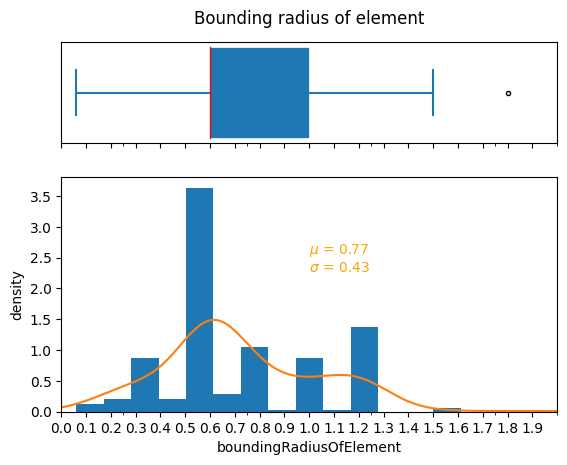

In [371]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
myFeature='boundingRadiusOfElement'

#box plot - the outliers are
VP = ax_box.boxplot(mySelected_df[myFeature], positions=[2], widths=1.5, patch_artist=True, vert=False,
                showmeans=False, showfliers=True,
                medianprops={"color": "red", "linewidth": 1},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5},
                flierprops={"markersize":3} )

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(0,2,0.1))
ax_box.set_xlim(0,2)

#histogram plot
n, bins, patches=ax_hist.hist(mySelected_df[myFeature], bins='auto', density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

myKde=(mySelected_df[myFeature]).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(mySelected_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(mySelected_df[myFeature]).std().round(2)}\n"
         )
ax_hist.text(1,2,stats, color='orange')

ax_hist.set(xlabel=myFeature, ylabel="density")
ax_hist.set_title('Bounding radius of element', y=1, pad=110)

#fig.savefig(ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

(0.5, 5.5)

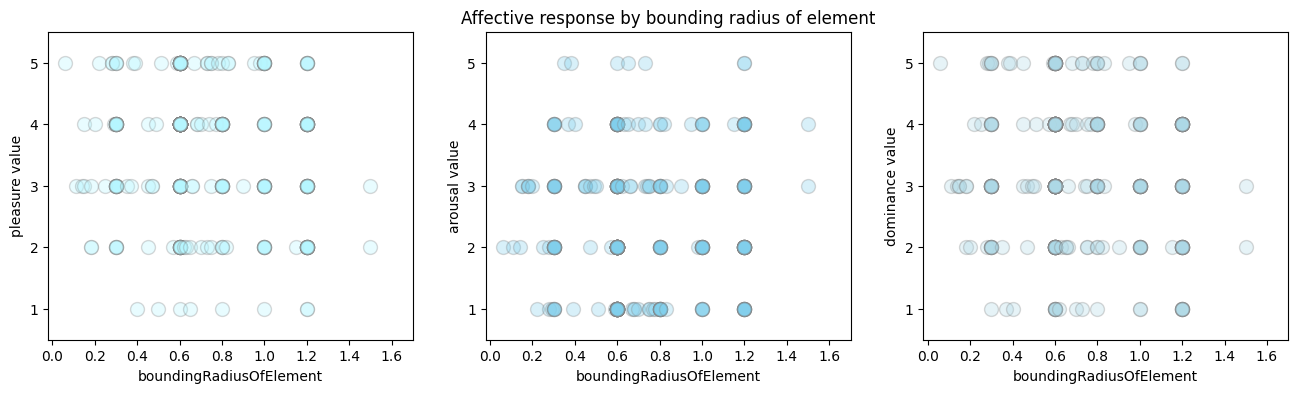

In [359]:
fig, ax=plt.subplots(1,3,figsize=(16,4))
myFeature='boundingRadiusOfElement'

ax[0].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['pleasure'],'o', color='#B6F6FF', markersize=10, label="pleasure", alpha=0.3, markeredgecolor='grey')
ax[1].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['arousal'],'o', color='#81CFEC', markersize=10, label="arousal", alpha=0.3, markeredgecolor='grey')
ax[2].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['dominance'],'o', color='lightblue', markersize=10, label="dominance", alpha=0.3, markeredgecolor='grey')


ax[0].set_xticks(np.arange(0,1.7,0.2), minor=False)
ax[0].set(xlabel=myFeature, ylabel="pleasure value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
ax[0].set_xlim(-0.02,1.7)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks(np.arange(0,1.7,0.2), minor=False)
ax[1].set(xlabel=myFeature, ylabel="arousal value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response by bounding radius of element")
ax[1].set_xlim(-0.02,1.7)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks(np.arange(0,1.7,0.2), minor=False)
ax[2].set(xlabel=myFeature, ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
ax[2].set_xlim(-0.02,1.7)
ax[2].set_ylim(0.5,5.5)

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

## spotsPosition

Text(0.5, 1.0, "Elements' position range over the facade")

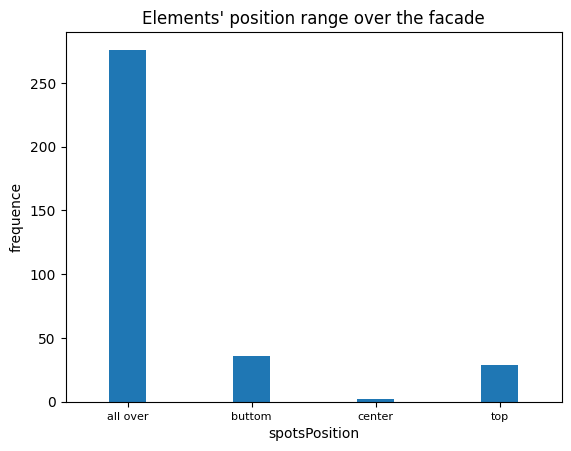

In [364]:
fig, ax_hist = plt.subplots()
myFeature='spotsPosition'


#ax_hist.set_yticks(np.arange(0,0))
ax_hist.set_xticks([0,1,2,3], labels=['all over', 'buttom', 'center', 'top'])
ax_hist.set_xlim(-0.5,3.5)



ax_hist.bar(mySelected_df[myFeature].value_counts().index, mySelected_df[myFeature].value_counts().values, width=0.3)


ax_hist.set_xlabel(myFeature, fontsize=10)
ax_hist.set_ylabel("frequence", fontsize=10)
plt.setp(ax_hist.get_xticklabels(), fontsize=8)
ax_hist.set_title("Elements' position range over the facade")

#fig.savefig(ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

(0.5, 5.5)

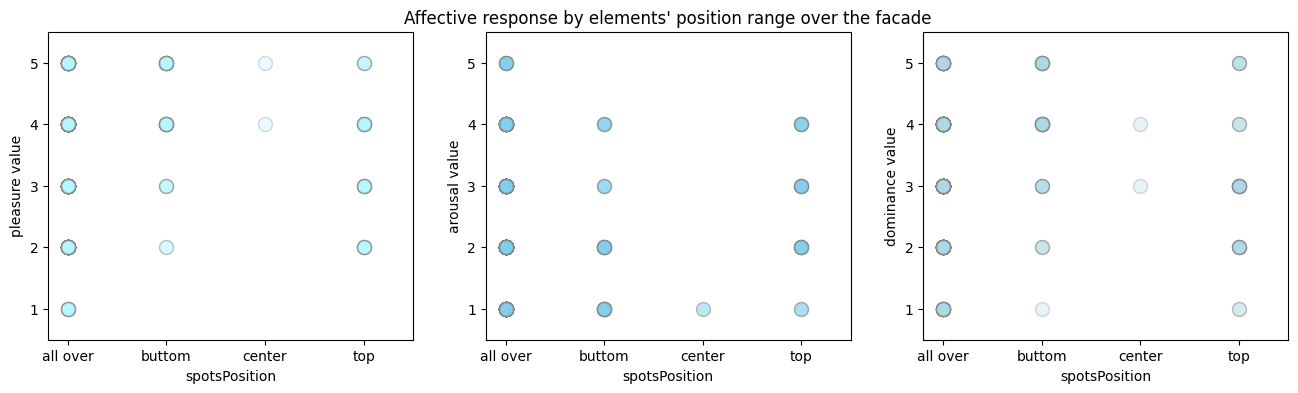

In [397]:
fig, ax=plt.subplots(1,3,figsize=(16,4))
myFeature='spotsPosition'

ax[0].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['pleasure'],'o', color='#B6F6FF', markersize=10, label="pleasure", alpha=0.3, markeredgecolor='grey')
ax[1].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['arousal'],'o', color='#81CFEC', markersize=10, label="arousal", alpha=0.3, markeredgecolor='grey')
ax[2].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['dominance'],'o', color='lightblue', markersize=10, label="dominance", alpha=0.3, markeredgecolor='grey')


ax[0].set_xticks([0,1,2,3], labels=['all over', 'buttom', 'center', 'top'])
ax[0].set(xlabel=myFeature, ylabel="pleasure value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
ax[0].set_xlim(-0.2,3.5)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks([0,1,2,3], labels=['all over', 'buttom', 'center', 'top'])
ax[1].set(xlabel=myFeature, ylabel="arousal value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response by elements' position range over the facade")
ax[1].set_xlim(-0.2,3.5)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks([0,1,2,3], labels=['all over', 'buttom', 'center', 'top'])
ax[2].set(xlabel=myFeature, ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
ax[2].set_xlim(-0.2,3.5)
ax[2].set_ylim(0.5,5.5)

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')